In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
a1 = np.array([[0.5,0.],[0.,-0.5]])
a2 = np.array([[0.,0.5],[0.5,0.]])
a3 = np.array([[-0.5,0.],[0.,0.5]])

In [61]:
b1 = np.array([0.5,0.5])
b2 = np.array([0.,0.5])
b3 = np.array([0.5,0.])

In [62]:
n = 1000
S = np.ones((n+1, n+1))

In [63]:
for k in range(6):
    s = np.zeros((n+1, n+1))
    for i, x in enumerate(np.linspace(0,1,n)):
        for j, y in enumerate(np.linspace(0,1,n)):
            if S[i][j] != 0:
                temp = np.array([x,y])
                t1 = a1.dot(temp) + b1
                t2 = a2.dot(temp) + b2
                t3 = a3.dot(temp) + b3
                s[int(t1[0]*n),int(t1[1]*n)]=1
                s[int(t2[0]*n),int(t2[1]*n)]=1
                s[int(t3[0]*n),int(t3[1]*n)]=1
    S = s.copy()

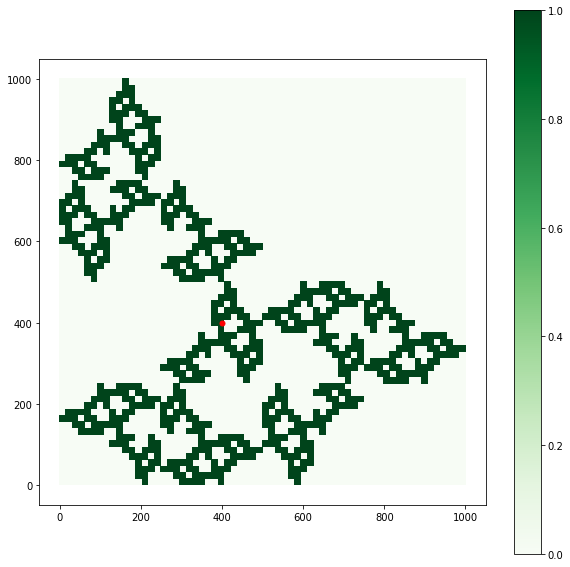

In [73]:
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(S.T,cmap='Greens',origin="lower")
plt.colorbar(im, ax=ax)
ax.plot(0.4*n, 0.4*n, 'o', markersize=5, color="red")
plt.axis('scaled')
plt.xlim(-50,n+50)
plt.ylim(-50,n+50)
plt.show()

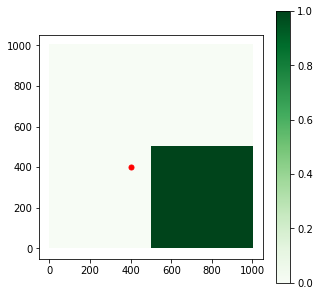

In [39]:
#A1 B1

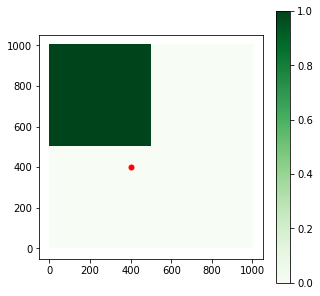

In [40]:
#A2 B2

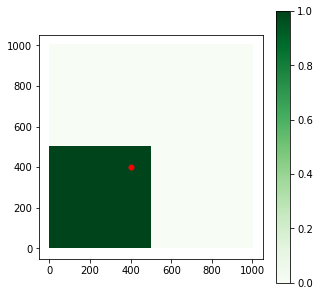

In [41]:
#A3 B3

In [79]:
import numpy.linalg as la
x0 = np.array([0.4,0.4])
x0

array([0.4, 0.4])

In [80]:
x1 = la.solve(a3, x0-b3)
x1

array([0.2, 0.8])

In [81]:
x2 = la.solve(a2, x1-b2)
x2

array([0.6, 0.4])

In [83]:
x3 = la.solve(a1, x2-b1)
x3

array([0.2, 0.2])

In [84]:
x4 = la.solve(a3, x3-b3)
x4

array([0.6, 0.4])

In [86]:
x5 = la.solve(a1, x4-b1)
x5

array([0.2, 0.2])

In [99]:
x6 = la.solve(a3, x5-b3)
x6

array([0.6, 0.4])

In [113]:
orb1 = list()
orb1.append(tuple(x0))
orb1.append(tuple(x1))
orb1.append(tuple(x2))
orb1.append(tuple(x3))
orb1.append(tuple(x4))

ptsx1,ptsy1 = zip(*orb1)

In [114]:
orb1

[(0.4, 0.4),
 (0.19999999999999996, 0.8),
 (0.6000000000000001, 0.3999999999999999),
 (0.20000000000000018, 0.20000000000000018),
 (0.5999999999999996, 0.40000000000000036)]

In [115]:
def arr(a,b,ax, color):
    ax.arrow(a[0]*n,a[1]*n, (b[0]-a[0])*n, (b[1]-a[1])*n, 
             head_width=30, width=4, length_includes_head=True, fc=color, ec=color)

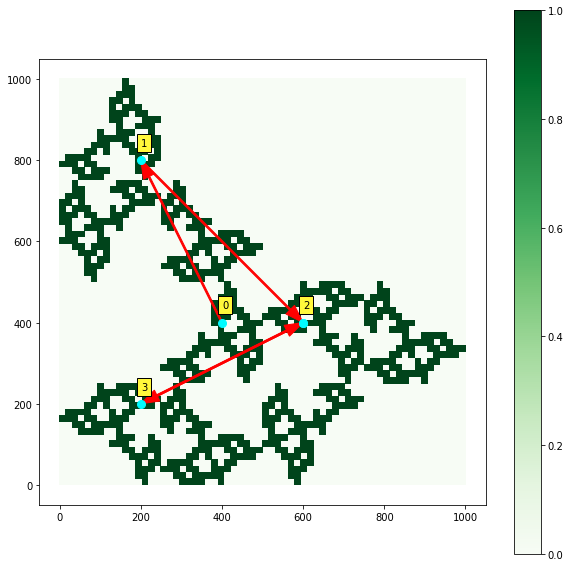

In [124]:
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(S.T,cmap='Greens',origin="lower")
plt.colorbar(im, ax=ax)
ax.plot([i * n for i in ptsx1],[j * n for j in ptsy1], 'o', markersize=8, color="#00fbff")

for i in range(len(orb1)-1):
    arr(orb1[i],orb1[i+1],ax,"red")
    ax.text(orb1[i][0]*n,orb1[i][1]*n+35, i, bbox=dict(facecolor='#fff83b', alpha=1))

plt.axis('scaled')
plt.xlim(-50,n+50)
plt.ylim(-50,n+50)
plt.show()

In [128]:
ans = np.array([1/21, 13/21])
t1 = a1.dot(ans) + b1
t2 = a3.dot(t1) + b3
t3 = a2.dot(t2) + b2
t3 == ans

array([ True,  True])